In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_file(file_path):
    data = np.load(file_path, allow_pickle=True)
    return data

In [99]:
files = [              
         "/home/mila/k/khang.ngo/Comp551/logs/results/net1.npz", 
         '/home/mila/k/khang.ngo/Comp551/logs/results/net2.npz', 
         '/home/mila/k/khang.ngo/Comp551/logs/results/net3.npz', 
]

In [100]:
net1 = read_file(files[0])
net2 = read_file(files[1])
net3 = read_file(files[2])

## Visualize effect of depth

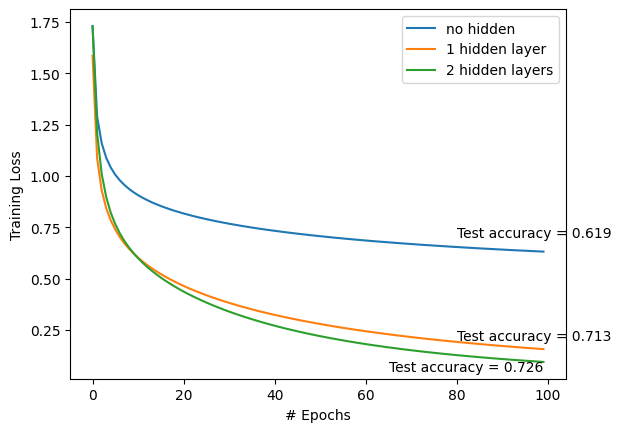

In [110]:
plt.plot(net1['loss'], label = 'no hidden')
plt.plot(net2['loss'], label = '1 hidden layer')
plt.plot(net3['loss'], label = '2 hidden layers')
plt.xlabel("# Epochs")
plt.ylabel("Training Loss")
plt.annotate(f"Test accuracy = {net1['test_acc']:.3f}", xy=(60, 0.4), xytext=(80, 0.7))
plt.annotate(f"Test accuracy = {net2['test_acc']:.3f}", xy=(60, 0.4), xytext=(80, 0.2))
plt.annotate(f"Test accuracy = {net3['test_acc']:.3f}", xy=(60, 0.4), xytext=(65, 0.05))
plt.legend()
plt.savefig(f"figs/effect_of_depth.pdf", format = 'pdf', transparent = True, bbox_inches = "tight")

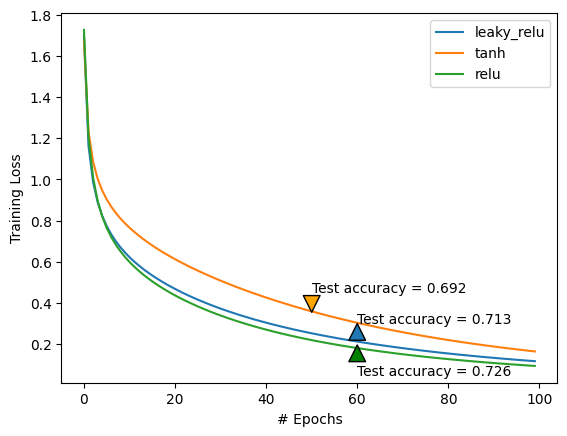

In [133]:
leaky_relu = read_file("/home/mila/k/khang.ngo/Comp551/logs/results/net3_leaky_relu.npz")
tanh = read_file("/home/mila/k/khang.ngo/Comp551/logs/results/net3_tanh.npz")
relu = read_file("/home/mila/k/khang.ngo/Comp551/logs/results/net3.npz")

plt.plot(leaky_relu['loss'], label = 'leaky_relu')
plt.plot(tanh['loss'], label = 'tanh')
plt.plot(relu['loss'], label = 'relu')
plt.xlabel("# Epochs")
plt.ylabel("Training Loss")
plt.annotate(f"Test accuracy = {leaky_relu['test_acc']:.3f}", xy=(60, 0.3), xytext=(60, 0.3),
            arrowprops=dict(shrink=0.05))
plt.annotate(f"Test accuracy = {tanh['test_acc']:.3f}", xy=(50, 0.35), xytext=(50, 0.45), arrowprops=dict(facecolor = "orange",shrink=0.05))
plt.annotate(f"test accuracy = {relu['test_acc']:.3f}", xy=(60, 0.2), xytext=(60, 0.05), arrowprops=dict(facecolor = "green",shrink=0.05))
plt.legend()
plt.savefig(f"figs/effect_of_activations.pdf", format = 'pdf', transparent = True, bbox_inches = "tight")

### Visualize effect of normalization

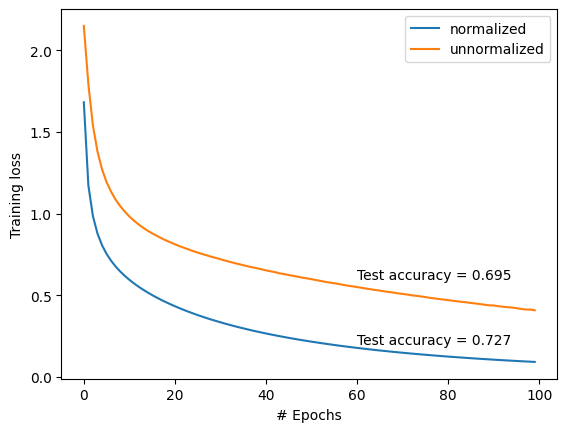

In [96]:
files = [
    "/home/mila/k/khang.ngo/Comp551/logs/results/unnormalized.npz", 
    "/home/mila/k/khang.ngo/Comp551/logs/results/normalized.npz", 
]
unnormalized = read_file(files[0])
normalized = read_file(files[1])

plt.plot(normalized['loss'], label = 'normalized')
plt.plot(unnormalized['loss'], label = 'unnormalized')
plt.legend()
plt.ylabel("Training loss")
plt.xlabel("# Epochs")
plt.annotate(f"Test accuracy = {normalized['test_acc']:.3f}", xy=(60, 0.4), xytext=(60, 0.2),
            )
plt.annotate(f"Test accuracy = {unnormalized['test_acc']:.3f}", xy=(60, 0.4), xytext=(60, 0.6),
            )
plt.savefig(f"figs/norm_vs_unnorm.pdf", format = 'pdf', transparent = True, bbox_inches = 'tight')
plt.show()

### Visualize L1 and L2 regularization

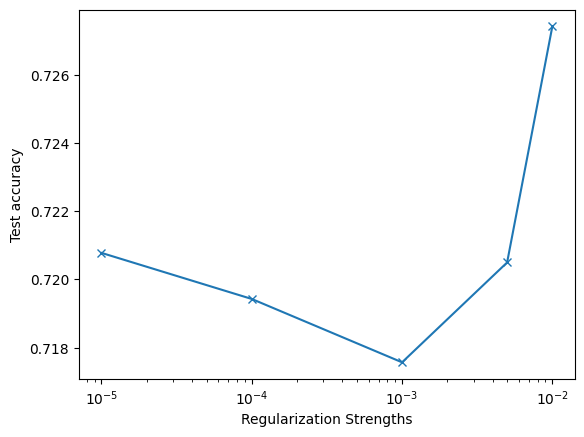

In [31]:
l2_files = ['/home/mila/k/khang.ngo/Comp551/logs/results/l2_reg_1e2.npz', 
            '/home/mila/k/khang.ngo/Comp551/logs/results/l2_reg_005.npz', 
            '/home/mila/k/khang.ngo/Comp551/logs/results/l2_reg_1e3.npz', 
            '/home/mila/k/khang.ngo/Comp551/logs/results/l2_reg_1e4.npz', 
            '/home/mila/k/khang.ngo/Comp551/logs/results/l2_reg_1e5.npz', 
            ]
label = [1e-2, 5e-3, 1e-3, 1e-4, 1e-5]
l2_test_acc = []
for file_ in l2_files:
    data = read_file(file_)
    l2_test_acc.append(data['test_acc'])

plt.plot(label, l2_test_acc, marker = 'x')
plt.xlabel("Regularization Strengths")
plt.ylabel("Test accuracy")
plt.xscale('log')

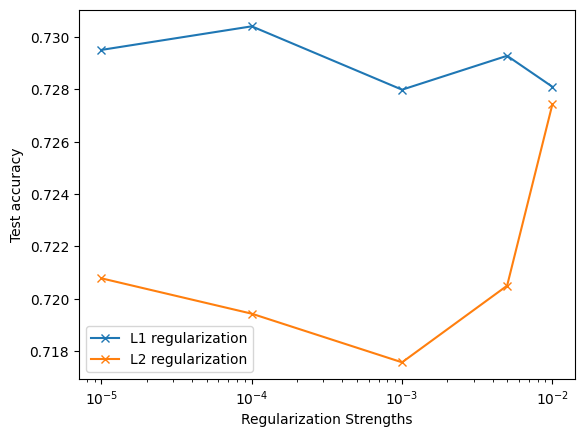

In [34]:
l1_files = ['/home/mila/k/khang.ngo/Comp551/logs/results/l1_reg_1e2.npz', 
            '/home/mila/k/khang.ngo/Comp551/logs/results/l1_reg_005.npz', 
            '/home/mila/k/khang.ngo/Comp551/logs/results/l1_reg_1e3.npz', 
            '/home/mila/k/khang.ngo/Comp551/logs/results/l1_reg_1e4.npz', 
            '/home/mila/k/khang.ngo/Comp551/logs/results/l1_reg_1e5.npz', 
            ]
label = [1e-2, 5e-3, 1e-3, 1e-4, 1e-5]
l1_test_acc = []
for file_ in l1_files:
    data = read_file(file_)
    l1_test_acc.append(data['test_acc'])

plt.plot(label, l1_test_acc, marker = 'x', label = 'L1 regularization')
plt.plot(label, l2_test_acc, marker = 'x', label = 'L2 regularization')
plt.xlabel("Regularization Strengths")
plt.ylabel("Test accuracy")
plt.legend()
plt.xscale('log')
plt.savefig(f"effect_of_regularization.pdf", format = "pdf", transparent = True, bbox_inches = "tight")
    

### CNN Visualization

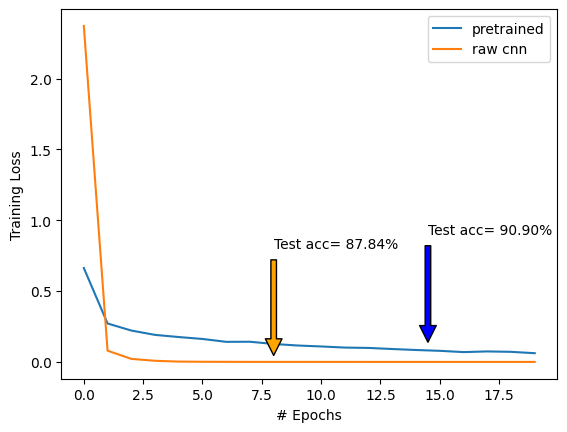

In [70]:
resnet = read_file('/home/mila/k/khang.ngo/Comp551/logs/results/cnn_resnet_128.npz')
raw_cnn = read_file('/home/mila/k/khang.ngo/Comp551/logs/results/cnn_raw_128.npz')
plt.plot(resnet['loss'], label = 'pretrained')
plt.plot(raw_cnn['loss'], label = 'raw cnn')
#plt.bar(['pretrained resnet', 'cnn'], [resnet['test_accuracy'], raw_cnn['test_accuracy']])
plt.annotate(f"Test acc= {resnet['test_accuracy'] * 100 :.2f}%", xy=(14.5, 0.1), xytext=(14.5, 0.9),
             arrowprops=dict(facecolor = "blue",shrink=0.05))
plt.annotate(f"Test acc= {raw_cnn['test_accuracy'] * 100:.2f}%", xy=(8, 0.007), xytext=(8, 0.8),
              arrowprops=dict(facecolor = "orange",shrink=0.05)
            )
plt.xlabel("# Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.savefig(f"figs/cnn_128_pix.pdf", format = "pdf", transparent = True, bbox_inches = "tight")
plt.show()

### Training with Larger Images

0.7390032624592192
0.9573246439934473
0.7264034199572506
0.9534527190424128


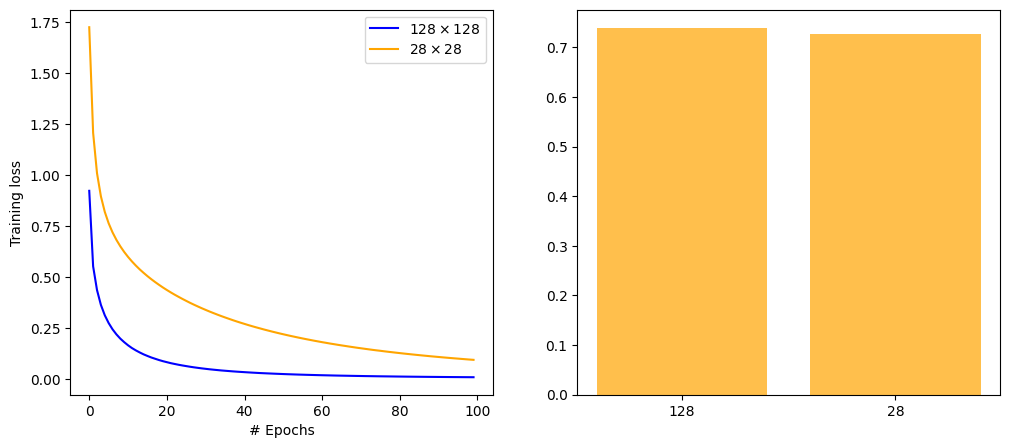

In [17]:
size_128 = read_file("/home/mila/k/khang.ngo/Comp551/logs/results/img_size_128_100_epochs.npz")
size_28 = read_file("/home/mila/k/khang.ngo/Comp551/logs/results/net3.npz")
print(size_128['test_acc'])
print(size_128['test_auc'])
print(size_28['test_acc'])
print(size_28['test_auc'])
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot line graph on the first subplot
axes[0].plot(size_128['loss'], label= r'$128\times 128$', color='blue')
axes[0].plot(size_28['loss'], label = r'$28\times 28$', color = 'orange')
#axes[0].set_title('Line Graph')
axes[0].set_xlabel('# Epochs')
axes[0].set_ylabel('Training loss')
axes[0].legend()

# Plot bar chart on the second subplot
axes[1].bar(['128', '28'], [size_128['test_acc'], size_28['test_acc']], color='orange', alpha=0.7)
# axes[1].set_title('Bar Chart')
# axes[1].set_xlabel('Categories')
# axes[1].set_ylabel('Values')
# axes[1].set_xticks()
# axes[1].set_xticklabels(categories)
# plt.plot(size_28['loss'], label = r"28 $ \times$ 28")
# plt.plot(size_128['loss'], label = r"128 $ \times$ 128")
# plt.legend()
plt.show()